# Comparison of five network designs

In [1]:
# Import standard libraries
from importlib import reload
import csv
import OmicsIntegrator as oi
import networkx as nx
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tqdm
import time
from upsetplot import from_contents, UpSet
from sklearn.cluster import AgglomerativeClustering
from IPython.display import Image
from IPython.core.display import SVG
import gseapy
from gseapy.plot import barplot, dotplot
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import random

# Import custom libraries
import pcst_utils_5 as pcst
import neighborhoods as nbh

In [2]:
# Reload modules in case of modifications
reload(pcst)
reload(nbh)

<module 'neighborhoods' from '/home/braunger/masterthesis/python_code/PCST/neighborhoods.py'>

In [3]:
# File paths
data_dir = "/home/braunger/masterthesis/data/"
save_dir = "/home/braunger/masterthesis/save/pcst/"
fig_dir = "/home/braunger/masterthesis/save/figures/pcst/"

# Design 1

In [65]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "5%", design = 1)
steps = ["60-79_80-89_90-96", "30-59_60-79_80-89", "10-29_30-59_60-79", "1-9_10-29_30-59"]
net_stats_d1, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 1)

net_stats_d1.iloc[:, 0:8]

n_nodes n_edges n_incl_terminals  percent_incl_terminals  \
1-9_10-29_30-59       388    3504              144               92.903226   
10-29_30-59_60-79     391    3096              211               94.618834   
30-59_60-79_80-89    1540   29735             1168               92.919650   
60-79_80-89_90-96    3080   78702             2202               93.029151   

                  n_Steiner_nodes n_TFs n_incl_TFs n_prized_TFs  
1-9_10-29_30-59               244   263         43            1  
10-29_30-59_60-79             180   325         58            0  
30-59_60-79_80-89             372   403        124            8  
60-79_80-89_90-96             878   413        153           33

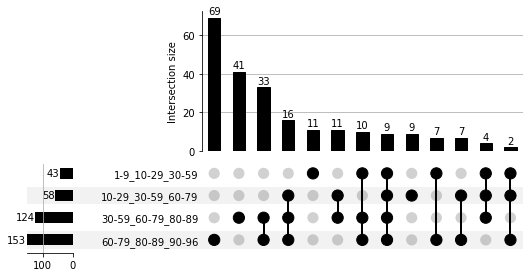

In [5]:
incl_TFs_1 = [[tf[:-4] for tf in net_stats_d1.iloc[net, 9]] for net in range(4)]
shared_TFs_design1 = set.intersection(*map(set,incl_TFs_1))
intersections = from_contents({'1-9_10-29_30-59': incl_TFs_1[0], 
                               '10-29_30-59_60-79': incl_TFs_1[1],
                               '30-59_60-79_80-89': incl_TFs_1[2],
                               '60-79_80-89_90-96': incl_TFs_1[3]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2).plot()

plt.savefig(fig_dir+'intersections_design1.png')

# Design 2

In [6]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "5%", design = 2)
net_stats_d2, target_counts_d2 = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 2)

net_stats_d2.iloc[:, 0:8]

n_nodes n_edges n_incl_terminals  percent_incl_terminals  \
1-9_10-29_30-59       565    6332              308               93.617021   
10-29_30-59_60-79     583    7385              371               94.162437   
30-59_60-79_80-89    1699   35574             1317               93.271955   
60-79_80-89_90-96    3080   78702             2202               93.029151   

                  n_Steiner_nodes n_TFs n_incl_TFs n_prized_TFs  
1-9_10-29_30-59               257   369         71            2  
10-29_30-59_60-79             212   369         90            0  
30-59_60-79_80-89             382   411        134            8  
60-79_80-89_90-96             878   413        153           33

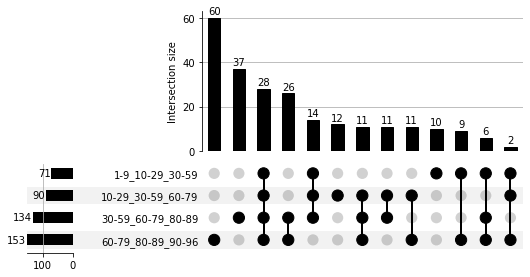

In [7]:
incl_TFs_2 = [[tf[:-4] for tf in net_stats_d2.iloc[net, 9]] for net in range(4)]
shared_TFs_design2 = set.intersection(*map(set,incl_TFs_2))
intersections = from_contents({'1-9_10-29_30-59': incl_TFs_2[0], 
                               '10-29_30-59_60-79': incl_TFs_2[1],
                               '30-59_60-79_80-89': incl_TFs_2[2],
                               '60-79_80-89_90-96': incl_TFs_2[3]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2).plot()

plt.savefig(fig_dir+'intersections_design2.png')

# Design 3

In [8]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "5%", design = 3)
net_stats_d3, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 3)

net_stats_d3.iloc[:, 0:8]

n_nodes n_edges n_incl_terminals  percent_incl_terminals  \
1-9_10-29_30-59       570    7678              315               95.744681   
10-29_30-59_60-79     594    9802              380               96.446701   
30-59_60-79_80-89    1766   46200             1386               98.158640   
60-79_80-89_90-96    3142   89471             2261               95.521757   

                  n_Steiner_nodes n_TFs n_incl_TFs n_prized_TFs  
1-9_10-29_30-59               255   369         69            2  
10-29_30-59_60-79             214   369         92            0  
30-59_60-79_80-89             380   411        132            8  
60-79_80-89_90-96             881   413        155           33

In [9]:
# Why do the networks in design 3 sometimes contain more TFs than in design 2? 

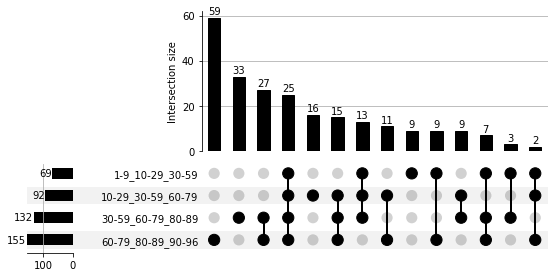

In [10]:
incl_TFs_3 = [[tf[:-4] for tf in net_stats_d3.iloc[net, 9]] for net in range(4)]
shared_TFs_design3 = set.intersection(*map(set,incl_TFs_3))
intersections = from_contents({'1-9_10-29_30-59': incl_TFs_3[0], 
                               '10-29_30-59_60-79': incl_TFs_3[1],
                               '30-59_60-79_80-89': incl_TFs_3[2],
                               '60-79_80-89_90-96': incl_TFs_3[3]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2).plot()

plt.savefig(fig_dir+'intersections_design3.png')

# Design 4

In [11]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "5%", design = 4)
net_stats_d4, target_counts_d4 = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 4)

net_stats_d4.iloc[:, 0:8]

n_nodes n_edges n_incl_terminals  percent_incl_terminals  \
1-9_10-29_30-59       519    5810              251               76.291793   
10-29_30-59_60-79     572    8162              338               85.786802   
30-59_60-79_80-89    1723   46309             1271               90.014164   
60-79_80-89_90-96    3142   89471             2261               95.521757   

                  n_Steiner_nodes n_TFs n_incl_TFs n_prized_TFs  
1-9_10-29_30-59               268   358         65            2  
10-29_30-59_60-79             234   387        102            0  
30-59_60-79_80-89             452   434        144            8  
60-79_80-89_90-96             881   413        155           33

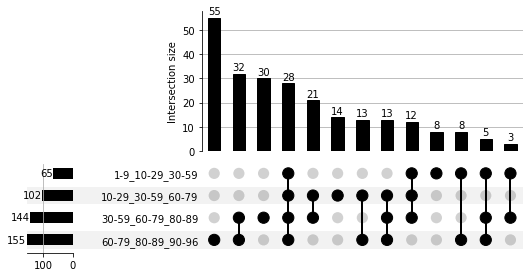

In [12]:
incl_TFs_4 = [[tf[:-4] for tf in net_stats_d4.iloc[net, 9]] for net in range(4)]
shared_TFs_design4 = set.intersection(*map(set,incl_TFs_4))
intersections = from_contents({'1-9_10-29_30-59': incl_TFs_4[0], 
                               '10-29_30-59_60-79': incl_TFs_4[1],
                               '30-59_60-79_80-89': incl_TFs_4[2],
                               '60-79_80-89_90-96': incl_TFs_4[3]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2).plot()

plt.savefig(fig_dir+'intersections_design4.png')

# Design 5

In [13]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "5%", design = 5)
net_stats_d5, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, 
                                                 TFs_with_targets = True, design = 5)

net_stats_d5.iloc[:, 0:8]

n_nodes n_edges n_incl_terminals  percent_incl_terminals  \
1-9_10-29_30-59      1005   22007              725               98.773842   
10-29_30-59_60-79    1158   33119              908               98.803047   
30-59_60-79_80-89    3387  166424             2969               98.572377   
60-79_80-89_90-96    3142   89471             2261               95.521757   

                  n_Steiner_nodes n_TFs n_incl_TFs n_prized_TFs  
1-9_10-29_30-59               280   389         94            2  
10-29_30-59_60-79             250   403        136            0  
30-59_60-79_80-89             418   445        171            8  
60-79_80-89_90-96             881   413        155           33

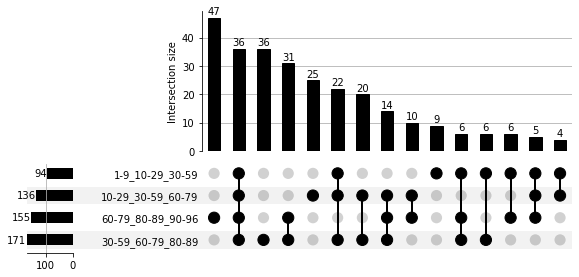

In [14]:
incl_TFs_5 = [[tf[:-4] for tf in net_stats_d5.iloc[net, 9]] for net in range(4)]
shared_TFs_design5 = set.intersection(*map(set,incl_TFs_5))
intersections = from_contents({'1-9_10-29_30-59': incl_TFs_5[0], 
                               '10-29_30-59_60-79': incl_TFs_5[1],
                               '30-59_60-79_80-89': incl_TFs_5[2],
                               '60-79_80-89_90-96': incl_TFs_5[3]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 2).plot()

plt.savefig(fig_dir+'intersections_design5.png')

# Comparison of the five designs

## TFs in the last network

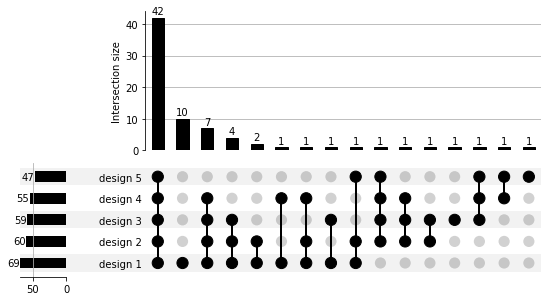

In [15]:
def last_net_TFs(incl_TFs):
    return set(incl_TFs[3]).difference(set.union(*map(set,incl_TFs[0:3])))

intersections = from_contents({'design 1': last_net_TFs(incl_TFs_1), 
                               'design 2': last_net_TFs(incl_TFs_2),
                               'design 3': last_net_TFs(incl_TFs_3),
                               'design 4': last_net_TFs(incl_TFs_4),
                               'design 5': last_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1).plot()
plt.savefig(fig_dir+'last_net_TFs.png')

In [16]:
set.intersection(last_net_TFs(incl_TFs_1), 
                 last_net_TFs(incl_TFs_2),
                 last_net_TFs(incl_TFs_3),
                 last_net_TFs(incl_TFs_4), 
                 last_net_TFs(incl_TFs_5))

{'AEBP2',
 'CDK8',
 'CENPA',
 'CHD1',
 'DDX5',
 'EGR2',
 'ELF2',
 'EPAS1',
 'FOXP3',
 'HCFC1',
 'HDAC3',
 'HES4',
 'HSF1',
 'JUNB',
 'LIN9',
 'MEF2C',
 'MEIS1',
 'MYC',
 'NCOR2',
 'NFYA',
 'NR2C2',
 'NR3C1',
 'OGT',
 'POLR3A',
 'PRKDC',
 'RAC3',
 'RCOR1',
 'RUNX1',
 'RXRA',
 'SMAD2',
 'SMARCB1',
 'SOX10',
 'SREBF2',
 'SRF',
 'STAT2',
 'STAT6',
 'TAF7',
 'TBL1X',
 'TBP',
 'TCF3',
 'TFAP2A',
 'ZNF143'}

## TFs shared between all networks

In [17]:
# Numbers of TFs per design
pd.concat([net_stats_d1['n_incl_TFs'].rename("design_1"), 
          net_stats_d2['n_incl_TFs'].rename("design_2"), 
          net_stats_d3['n_incl_TFs'].rename("design_3"),
          net_stats_d4['n_incl_TFs'].rename("design_4"),
          net_stats_d5['n_incl_TFs'].rename("design_5")], axis = 1)

design_1 design_2 design_3 design_4 design_5
1-9_10-29_30-59         43       71       69       65       94
10-29_30-59_60-79       58       90       92      102      136
30-59_60-79_80-89      124      134      132      144      171
60-79_80-89_90-96      153      153      155      155      155

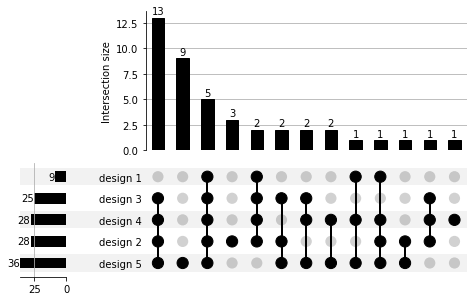

In [18]:
# How strongly do the TFs that occur in all 4 networks overlap?
intersections = from_contents({'design 1': shared_TFs_design1, 
                               'design 2': shared_TFs_design2,
                               'design 3': shared_TFs_design3,
                               'design 4': shared_TFs_design4,
                               'design 5': shared_TFs_design5})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1).plot()
plt.savefig(fig_dir+'intersections_all-designs.png')

In [19]:
set.intersection(shared_TFs_design1, 
                 shared_TFs_design2,
                 shared_TFs_design3,
                 shared_TFs_design4, 
                 shared_TFs_design5)

{'AHR', 'FOXA1', 'MAZ', 'NOTCH1', 'SRC'}

## Old-specific TFs

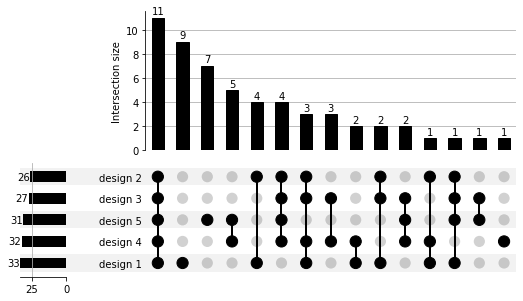

In [20]:
def old_specific_TFs(incl_TFs):
    return set.intersection(*map(set, incl_TFs[2:])).difference(set.union(*map(set,incl_TFs[0:2])))

intersections = from_contents({'design 1': old_specific_TFs(incl_TFs_1), 
                               'design 2': old_specific_TFs(incl_TFs_2),
                               'design 3': old_specific_TFs(incl_TFs_3),
                               'design 4': old_specific_TFs(incl_TFs_4),
                               'design 5': old_specific_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1).plot()
plt.savefig(fig_dir+'old_specific_TFs.png')

In [21]:
set.intersection(old_specific_TFs(incl_TFs_1), 
                 old_specific_TFs(incl_TFs_2),
                 old_specific_TFs(incl_TFs_3),
                 old_specific_TFs(incl_TFs_4), 
                 old_specific_TFs(incl_TFs_5))

{'ARNTL',
 'BCOR',
 'EWSR1',
 'GLI2',
 'IRF3',
 'JUND',
 'MYH11',
 'NFE2L2',
 'POLR2A',
 'REST',
 'SMAD4'}

## TFs in the second network

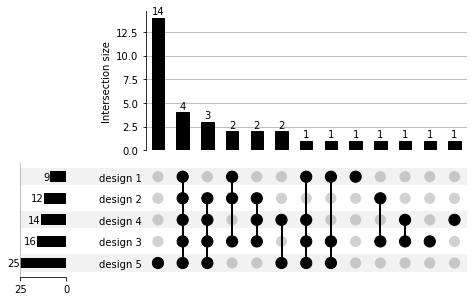

In [22]:
def second_net_TFs(incl_TFs):
    return set(incl_TFs[1]).difference(set.union(*map(set,[incl_TFs[i] for i in [0, 2, 3]])))

intersections = from_contents({'design 1': second_net_TFs(incl_TFs_1), 
                               'design 2': second_net_TFs(incl_TFs_2),
                               'design 3': second_net_TFs(incl_TFs_3),
                               'design 4': second_net_TFs(incl_TFs_4),
                               'design 5': second_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1).plot()
plt.savefig(fig_dir+'second_net_TFs.png')

In [23]:
set.intersection(second_net_TFs(incl_TFs_1), 
                 second_net_TFs(incl_TFs_2),
                 second_net_TFs(incl_TFs_3),
                 second_net_TFs(incl_TFs_4), 
                 second_net_TFs(incl_TFs_5))

{'E2F4', 'PIAS1', 'ZNF280D', 'ZNF281'}

## TFs in the third network

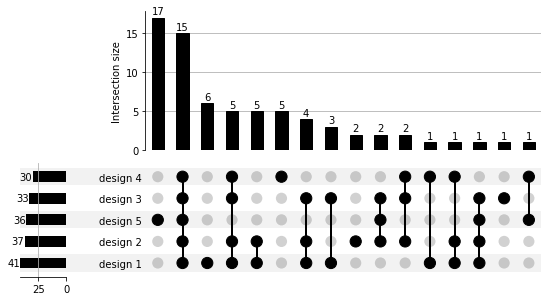

In [24]:
def third_net_TFs(incl_TFs):
    return set(incl_TFs[2]).difference(set.union(*map(set,[incl_TFs[i] for i in [0, 1, 3]])))

intersections = from_contents({'design 1': third_net_TFs(incl_TFs_1), 
                               'design 2': third_net_TFs(incl_TFs_2),
                               'design 3': third_net_TFs(incl_TFs_3),
                               'design 4': third_net_TFs(incl_TFs_4),
                               'design 5': third_net_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1).plot()
plt.savefig(fig_dir+'third_net_TFs.png')

In [25]:
set.intersection(third_net_TFs(incl_TFs_1), 
                 third_net_TFs(incl_TFs_2),
                 third_net_TFs(incl_TFs_3),
                 third_net_TFs(incl_TFs_4), 
                 third_net_TFs(incl_TFs_5))

{'ARNT',
 'BMI1',
 'EZH2',
 'FOS',
 'GFI1B',
 'HAND1',
 'JMJD6',
 'LHX2',
 'LMNB1',
 'NFAT5',
 'RNF2',
 'SIRT6',
 'SMAD1',
 'SNAI2',
 'ZFHX3'}

## Young-specific TFs

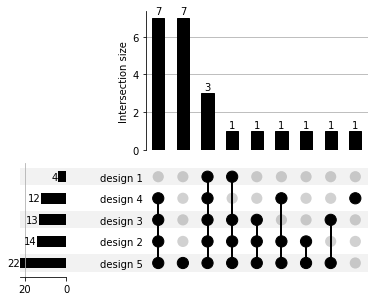

In [26]:
def young_specific_TFs(incl_TFs):
    return set.intersection(*map(set, incl_TFs[:3])).difference(set(incl_TFs[3]))

intersections = from_contents({'design 1': young_specific_TFs(incl_TFs_1), 
                               'design 2': young_specific_TFs(incl_TFs_2),
                               'design 3': young_specific_TFs(incl_TFs_3),
                               'design 4': young_specific_TFs(incl_TFs_4),
                               'design 5': young_specific_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1).plot()
plt.savefig(fig_dir+'young_specific_TFs.png')

In [27]:
set.intersection(young_specific_TFs(incl_TFs_1), 
                 young_specific_TFs(incl_TFs_2),
                 young_specific_TFs(incl_TFs_3),
                 young_specific_TFs(incl_TFs_4), 
                 young_specific_TFs(incl_TFs_5))

{'EP300', 'ERG', 'TCF21'}

## TFs in the middle

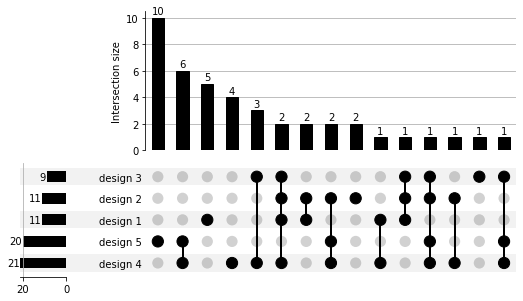

In [28]:
def middle_specific_TFs(incl_TFs):
    return set.intersection(*map(set, incl_TFs[1:3])).difference(set.union(*map(set,[incl_TFs[i] for i in [0, 3]])))

intersections = from_contents({'design 1': middle_specific_TFs(incl_TFs_1), 
                               'design 2': middle_specific_TFs(incl_TFs_2),
                               'design 3': middle_specific_TFs(incl_TFs_3),
                               'design 4': middle_specific_TFs(incl_TFs_4),
                               'design 5': middle_specific_TFs(incl_TFs_5)})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 1).plot()

In [29]:
set.intersection(middle_specific_TFs(incl_TFs_1), 
                 middle_specific_TFs(incl_TFs_2),
                 middle_specific_TFs(incl_TFs_3),
                 middle_specific_TFs(incl_TFs_4), 
                 middle_specific_TFs(incl_TFs_5))

set()

# Design 2: Analyses of the TFs that occur in all 8 networks

## Percentage of differentially expressed genes that are targeted

In [30]:
# Get number of DE targets for the TFs in each of the networks
shared_TFs = set.intersection(*map(set,incl_TFs_2))
targets_shared_TFs = pd.DataFrame(index = shared_TFs)

for index, (name, df) in enumerate(target_counts_d2.items()):
    df.index = df.index.str.replace("_tr0", "")
    if index == 0: 
        df = df[['percent_genome_targets', 'percent_DE_targeted']]
        df.columns = ['percent_genome_targets', name]
    else:
        df = df[['percent_DE_targeted']]
        df.columns = [name]
    targets_shared_TFs = targets_shared_TFs.join(df)

targets_shared_TFs = targets_shared_TFs.loc[(targets_shared_TFs.iloc[:, 1:]!=0).any(axis=1)]    
targets_percent = targets_shared_TFs.iloc[:,1:].div(targets_shared_TFs.percent_genome_targets, axis=0)
targets_shared_TFs.head()

percent_genome_targets  1-9_10-29_30-59  10-29_30-59_60-79  \
ATF1                  0.116188         0.187500           0.163009   
GATA2                 0.052709         0.091346           0.078370   
NOTCH1                0.351719         0.456731           0.410658   
GATA4                 0.067722         0.182692           0.141066   
EHF                   0.090350         0.115385           0.094044   

        30-59_60-79_80-89  60-79_80-89_90-96  
ATF1             0.147213           0.197839  
GATA2            0.073171           0.082294  
NOTCH1           0.446864           0.677473  
GATA4            0.111498           0.068994  
EHF              0.108014           0.157107

## TF correlations 

<Figure size 432x288 with 0 Axes>

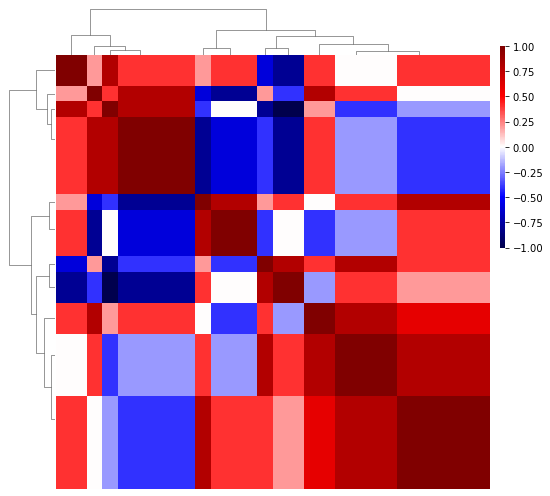

In [31]:
# Correlation between the TFs
corr_TFs = targets_shared_TFs.iloc[:, 1:].T.corr(method = "spearman")
plt.figure()
sns.clustermap(corr_TFs,
               method='average',
               metric='cosine',
               row_cluster=True, col_cluster=True,
               xticklabels=False, yticklabels=False,
               cmap='seismic', cbar_pos=(1, 0.5, 0.01, .4),
               dendrogram_ratio=(.1, .1),
               vmin = -1, vmax = 1, figsize=(7,7))
plt.savefig(fig_dir+'correlation_heatmap.png')
plt.show()

## Analyses of the clusters

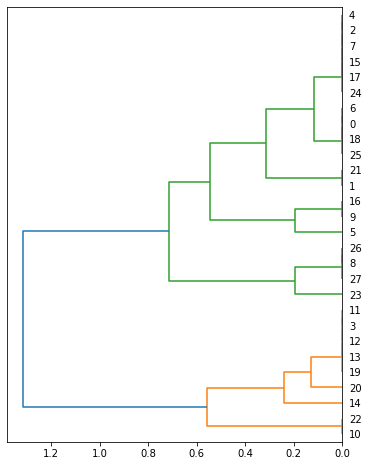

In [32]:
dend = linkage(corr_TFs, 
               method='average', metric='cosine')
plt.figure(figsize = (6, 8))
dendrogram(dend, orientation = "left", color_threshold = 1)
plt.savefig(fig_dir+'dendrogram.png')
plt.show()

In [33]:
TF_clusters = pd.DataFrame({'TF': corr_TFs.index, 
                            'cluster': fcluster(dend, 1, criterion = 'distance')})
cluster_counts = pd.DataFrame(TF_clusters['cluster'].value_counts()).reset_index()#.sort_values(by = 'index')
cluster_counts.columns = ['cluster', 'number_of_TFs']
cluster_counts

cluster  number_of_TFs
0        2             19
1        1              9

In [34]:
targets_percent.reset_index(inplace=True)

### Plot trajectories

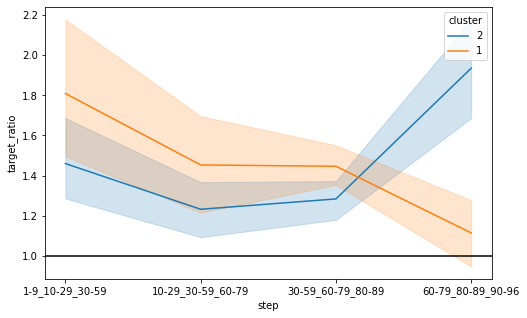

In [35]:
# plot trajectory of the number of targets in the clusters
targets_long = pd.melt(targets_percent, id_vars = ['index'],
       var_name='step', value_name = 'target_ratio')
targets_long.columns = ['TF', 'step', 'target_ratio']
targets_long = targets_long.merge(TF_clusters)
targets_long['cluster'] = targets_long['cluster'].astype(str)

plt.figure(figsize = (8, 5))
graph = sns.lineplot(data=targets_long,
             x='step', y='target_ratio',
             hue="cluster")
graph.axhline(1, color='black')
plt.savefig(fig_dir+'trajectories_cluster.png')
plt.show()

### Create network

In [36]:
# Create network
# Threshold correlation matrix
corr_TFs_0 = corr_TFs.copy()
corr_TFs_0[corr_TFs_0 < 0.6] = 0

corr_long = pd.melt(corr_TFs_0.reset_index(), id_vars='index')
corr_long = corr_long[(corr_long['value'] > 0) & (corr_long['index'] != corr_long['variable'])]
corr_long.columns = ['protein1', 'protein2', 'corr']
corr_long

network = nx.from_pandas_edgelist(corr_long, 'protein1', 'protein2', 'corr')
# add clusters as node attributes
clusters = {TF: TF_clusters.loc[TF_clusters['TF'] == TF, 'cluster'].tolist() for TF in list(network.nodes())}
nx.set_node_attributes(network, clusters, name='cluster')
oi.output_networkx_graph_as_interactive_html(network, filename=save_dir + "TF_corr_0.6.html")

PosixPath('/home/braunger/masterthesis/save/pcst/TF_corr_0.6.html')

In [37]:
# network image created from the interactive html file
#SVG(fig_dir+"net_DESeq_5%.svg")

In [38]:
# Create subnetworks for each cluster
pcst.create_subnet(1, corr_long, TF_clusters, data_dir, save_dir, 0.8)
pcst.create_subnet(2, corr_long, TF_clusters, data_dir, save_dir, 0.8)

# Intersections of the Steiner nodes

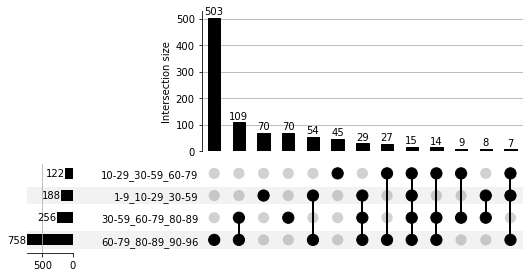

In [40]:
steiner_nodes = [[node[:-4] for node in net_stats_d2.iloc[net, 11]] for net in range(4)]

intersections = from_contents({'1-9_10-29_30-59': steiner_nodes[0], 
                               '10-29_30-59_60-79': steiner_nodes[1],
                               '30-59_60-79_80-89': steiner_nodes[2],
                               '60-79_80-89_90-96': steiner_nodes[3]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 5).plot()

plt.savefig(fig_dir+'intersections_steiner_10%.png')

In [41]:
# Steiner nodes included in all networks
shared_nodes = [node + '_tr0' for node in set.intersection(*map(set,steiner_nodes[:3]))]
degrees_steiner_nodes = pd.DataFrame(index = shared_nodes)

for name, net in net_dict.items():
    degrees = pd.DataFrame(net.degree(shared_nodes)).set_index(0)
    degrees.columns = [name.split("-")[2]]
    degrees_steiner_nodes = degrees_steiner_nodes.join(degrees)

shared_nodes = [node[:-4] for node in shared_nodes]
print(*shared_nodes, sep = ", ")

TAB2, CYCS, BCL2L1, JAK1, PPP2CA, CD44, NEO1, HSP90AA1, AXIN1, CDH1, TRAF6, KDR, TGFBR1, YWHAZ, PXN, VCL, APAF1


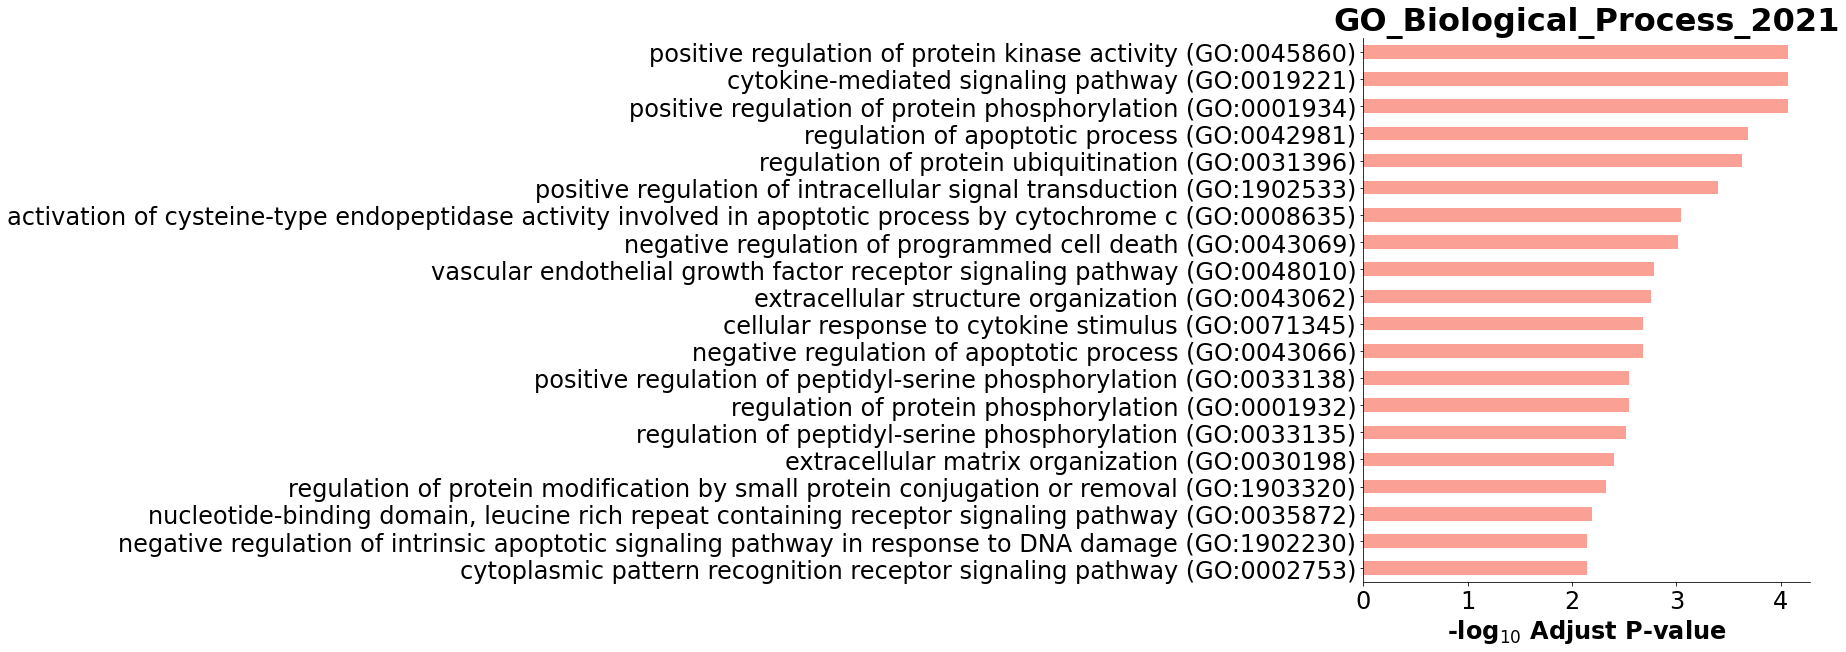

In [42]:
# GSEA on the shared Steiner nodes
enr = gseapy.enrichr(gene_list=shared_nodes, 
                     gene_sets='GO_Biological_Process_2021', 
                     description='', outdir=save_dir+'GO_steiner', format='png',
                     verbose=False)
# Visualize results
#enr.results.head(5)
barplot(enr.res2d, title='GO_Biological_Process_2021',
        cutoff=0.01, top_term=20, figsize=(8, 10), color='salmon')

# TF Ranking based on the number of DE targets

## Top 10 TFs per network 

In [43]:
# Ranking all TFs according to the number of targets in each network
TFs_ranking = pd.DataFrame(columns = ['TF', 'targets', 'rank', 'life_stage'])

for name, df in target_counts_d2.items():
    df = df[df.index.isin(shared_TFs)]
    df = df.sort_values(by = 'protein1_incl_targets', ascending = False)
    TFs_ranking_net = pd.DataFrame({'TF': df.index.tolist(), 
                            'targets': df.iloc[:, 0],
                            'rank': range(1, df.shape[0]+1, 1), 
                            'life_stage': name})
    TFs_ranking = pd.concat([TFs_ranking, TFs_ranking_net])

TFs_ranking = TFs_ranking.reset_index(drop = True)
TFs_ranking.head()

TFs_ranking_top10 = TFs_ranking[TFs_ranking['rank'] < 21]

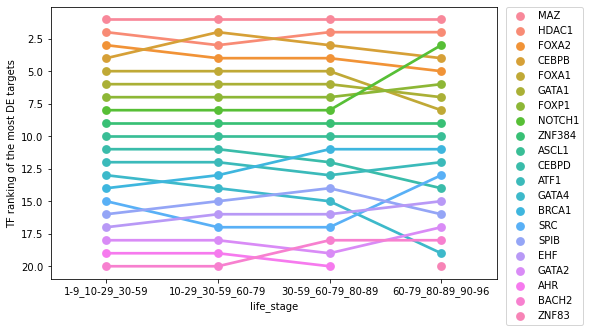

In [44]:
plt.figure(figsize = (8, 5))
sns.pointplot(data = TFs_ranking_top10, x = 'life_stage', y = 'rank', hue = 'TF')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.ylim(reversed(plt.ylim()))
plt.ylabel('TF ranking of the most DE targets')
plt.show()

In [45]:
TF_occurences = TFs_ranking_top10.groupby('TF')['life_stage'].apply(list).reset_index()
TF_occurences['n'] = [len(stages) for stages in TF_occurences['life_stage'].tolist()]

ranks = TFs_ranking.groupby('TF')['rank'].agg(['mean', 'min', 'max', 'var']).reset_index()
TF_occurences = TF_occurences.merge(ranks).sort_values(by = 'var', ascending = False).sort_values(by = 'var', ascending = False)

TF_occurences

TF                                         life_stage  n   mean  min  \
13   GATA4  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4  15.25   13   
16  NOTCH1  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4   6.75    3   
18     SRC  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4  15.50   13   
4    BRCA1  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4  12.25   11   
8    FOXA1  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4   5.75    5   
6    CEBPD  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4  12.00   11   
20   ZNF83                                [60-79_80-89_90-96]  1  21.75   20   
3    BACH2  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4  19.00   18   
0      AHR  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  3  19.75   19   
5    CEBPB  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4   3.25    2   
17    SPIB  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4  15.25   14   
12   GATA2  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4  18.00   17   
9    FOXA2  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4   4.00    3   
7      EHF  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4  16.00   15   
11   GATA1  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4   6.25    6   
14   HDAC1  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4   2.25    2   
2     ATF1  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4  12.25   12   
10   FOXP1  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4   6.75    6   
1    ASCL1  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4  10.00   10   
15     MAZ  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4   1.00    1   
19  ZNF384  [1-9_10-29_30-59, 10-29_30-59_60-79, 30-59_60-...  4   9.00    9   

    max       var  
13   19  6.916667  
16    8  6.250000  
18   17  3.666667  
4    14  2.250000  
8     8  2.250000  
6    14  2.000000  
20   23  1.583333  
3    20  1.333333  
0    21  0.916667  
5     4  0.916667  
17   16  0.916667  
12   19  0.666667  
9     5  0.666667  
7    17  0.666667  
11    7  0.250000  
14    3  0.250000  
2    13  0.250000  
10    7  0.250000  
1    10  0.000000  
15    1  0.000000  
19    9  0.000000

## TFs with greatest differences in the ranking

In [46]:
ranks['range'] = ranks['max'] - ranks['min']
ranks = ranks.sort_values(by = 'range', ascending = False)
top_TFs = ranks.iloc[0:10, 0].tolist()
ranks.head(n=10)

TF   mean  min  max       var  range
16   GATA4  15.25   13   19  6.916667      6
25   SUMO1  25.50   23   28  4.333333      5
21  NOTCH1   6.75    3    8  6.250000      5
23     SRC  15.50   13   17  3.666667      4
19  HOXB13  23.50   22   26  3.000000      4
27   ZNF83  21.75   20   23  1.583333      3
5    BRCA1  12.25   11   14  2.250000      3
7    CEBPD  12.00   11   14  2.000000      3
17   GLIS1  22.00   21   24  2.000000      3
10   FOXA1   5.75    5    8  2.250000      3

<Figure size 432x288 with 0 Axes>

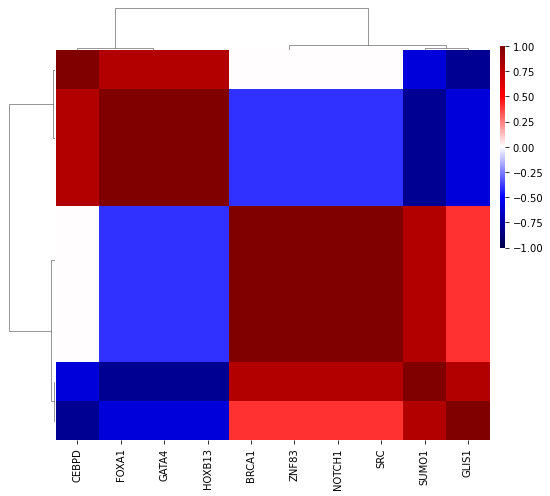

In [47]:
# Correlation heatmap
plt.figure()
sns.clustermap(corr_TFs.loc[top_TFs, top_TFs],
               method='average',
               metric='cosine',
               row_cluster=True, col_cluster=True,
               xticklabels=True, yticklabels=False,
               cmap='seismic', cbar_pos=(1, 0.5, 0.01, .4),
               dendrogram_ratio=(.1, .1),
               vmin = -1, vmax = 1, figsize=(7,7))
plt.savefig(fig_dir+'correlation_heatmap_rankingTFs.png')
plt.show()

In [49]:
# Network
tf_targets = pd.read_csv(data_dir + 'tf_data/tf-target-information.txt', sep = '\t')
tf_targets = tf_targets[['TF', 'target']].drop_duplicates()
tf_targets_sub = tf_targets[tf_targets['TF'].isin(top_TFs)]

corr_TFs_0 = corr_TFs.copy()
corr_TFs_0[corr_TFs_0 < 0.4] = 0

corr_long = pd.melt(corr_TFs_0.reset_index(), id_vars='index')
corr_long = corr_long[(corr_long['value'] > 0) & (corr_long['index'] != corr_long['variable'])]
corr_long.columns = ['protein1', 'protein2', 'corr']

corr_selected = corr_long.loc[corr_long['protein1'].isin(top_TFs), :]
corr_selected = corr_selected.loc[corr_selected['protein2'].isin(top_TFs), :]
corr_selected['shared_targets'] = corr_selected.apply(lambda row : len(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein1'], 'target']).intersection(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein2'], 'target']))), axis = 1)
corr_selected['targets_protein1'] = corr_selected.apply(lambda row : len(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein1'], 'target'])), axis = 1)
corr_selected['targets_protein2'] = corr_selected.apply(lambda row : len(set(tf_targets_sub.loc[tf_targets_sub['TF'] == row['protein2'], 'target'])), axis = 1)
corr_selected['percent_shared_targets'] = corr_selected['shared_targets']/corr_selected[['targets_protein1', 'targets_protein2']].min(axis=1)

# Add additional row such that the coloring is not inverted
df = {'protein1': 'SRC', 'protein2': 'SRC', 'corr': 1, 'shared_targets': 0, 'targets_protein1': 0, 'targets_protein2':0, 'percent_shared_targets':0}
corr_selected = corr_selected.append(df, ignore_index = True)

network = nx.from_pandas_edgelist(corr_selected, 'protein1', 'protein2', ['corr', 'shared_targets', 'percent_shared_targets'])
oi.output_networkx_graph_as_interactive_html(network, filename=save_dir + 'TFs_ranking.html')

PosixPath('/home/braunger/masterthesis/save/pcst/TFs_ranking.html')

# Analyses of TFs without removing the ones without targets

In [50]:
net_stats, target_counts = pcst.compare_networks(net_dict, data_dir, fig_dir, save_dir, steps, design = 2, TFs_with_targets = False)

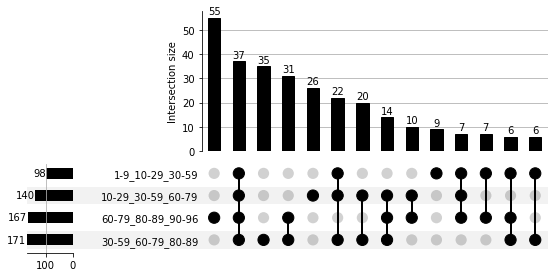

In [51]:
incl_TFs = [[tf[:-4] for tf in net_stats.iloc[net, 9]] for net in range(4)]

intersections = from_contents({'1-9_10-29_30-59': incl_TFs[0], 
                               '10-29_30-59_60-79': incl_TFs[1],
                               '30-59_60-79_80-89': incl_TFs[2],
                               '60-79_80-89_90-96': incl_TFs[3]})
upset = UpSet(intersections, subset_size='count', show_counts = True,  
              sort_by="cardinality", min_subset_size = 5).plot()

plt.savefig(fig_dir+'intersections_allTFs_5%_without-targets.png')

<Figure size 432x288 with 0 Axes>

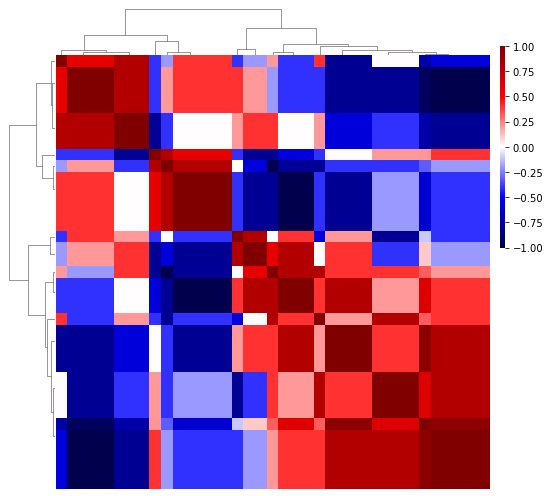

In [52]:
# Get number of DE targets for the TFs in each of the networks
shared_TFs = set.intersection(*map(set,incl_TFs))
targets_shared_TFs = pd.DataFrame(index = shared_TFs)

for index, (name, df) in enumerate(target_counts.items()):
    df.index = df.index.str.replace("_tr0", "")
    if index == 0: 
        df = df[['percent_genome_targets', 'percent_DE_targeted']]
        df.columns = ['percent_genome_targets', name.split("-")[2]]
    else:
        df = df[['percent_DE_targeted']]
        df.columns = [name.split("-")[2]]
    targets_shared_TFs = targets_shared_TFs.join(df)

targets_shared_TFs = targets_shared_TFs.loc[(targets_shared_TFs.iloc[:, 1:]!=0).any(axis=1)] 

# Correlation between the TFs
corr_TFs = targets_shared_TFs.iloc[:, 1:].T.corr(method = "spearman")
plt.figure()
sns.clustermap(corr_TFs,
               method='average',
               metric='cosine',
               row_cluster=True, col_cluster=True,
               xticklabels=False, yticklabels=False,
               cmap='seismic', cbar_pos=(1, 0.5, 0.01, .4),
               dendrogram_ratio=(.1, .1),
               vmin = -1, vmax = 1, figsize=(7,7))
plt.savefig(fig_dir+'correlation_heatmap_without-targets.png')
plt.show()

# Neighborhood networks for design 2

## Shared TFs

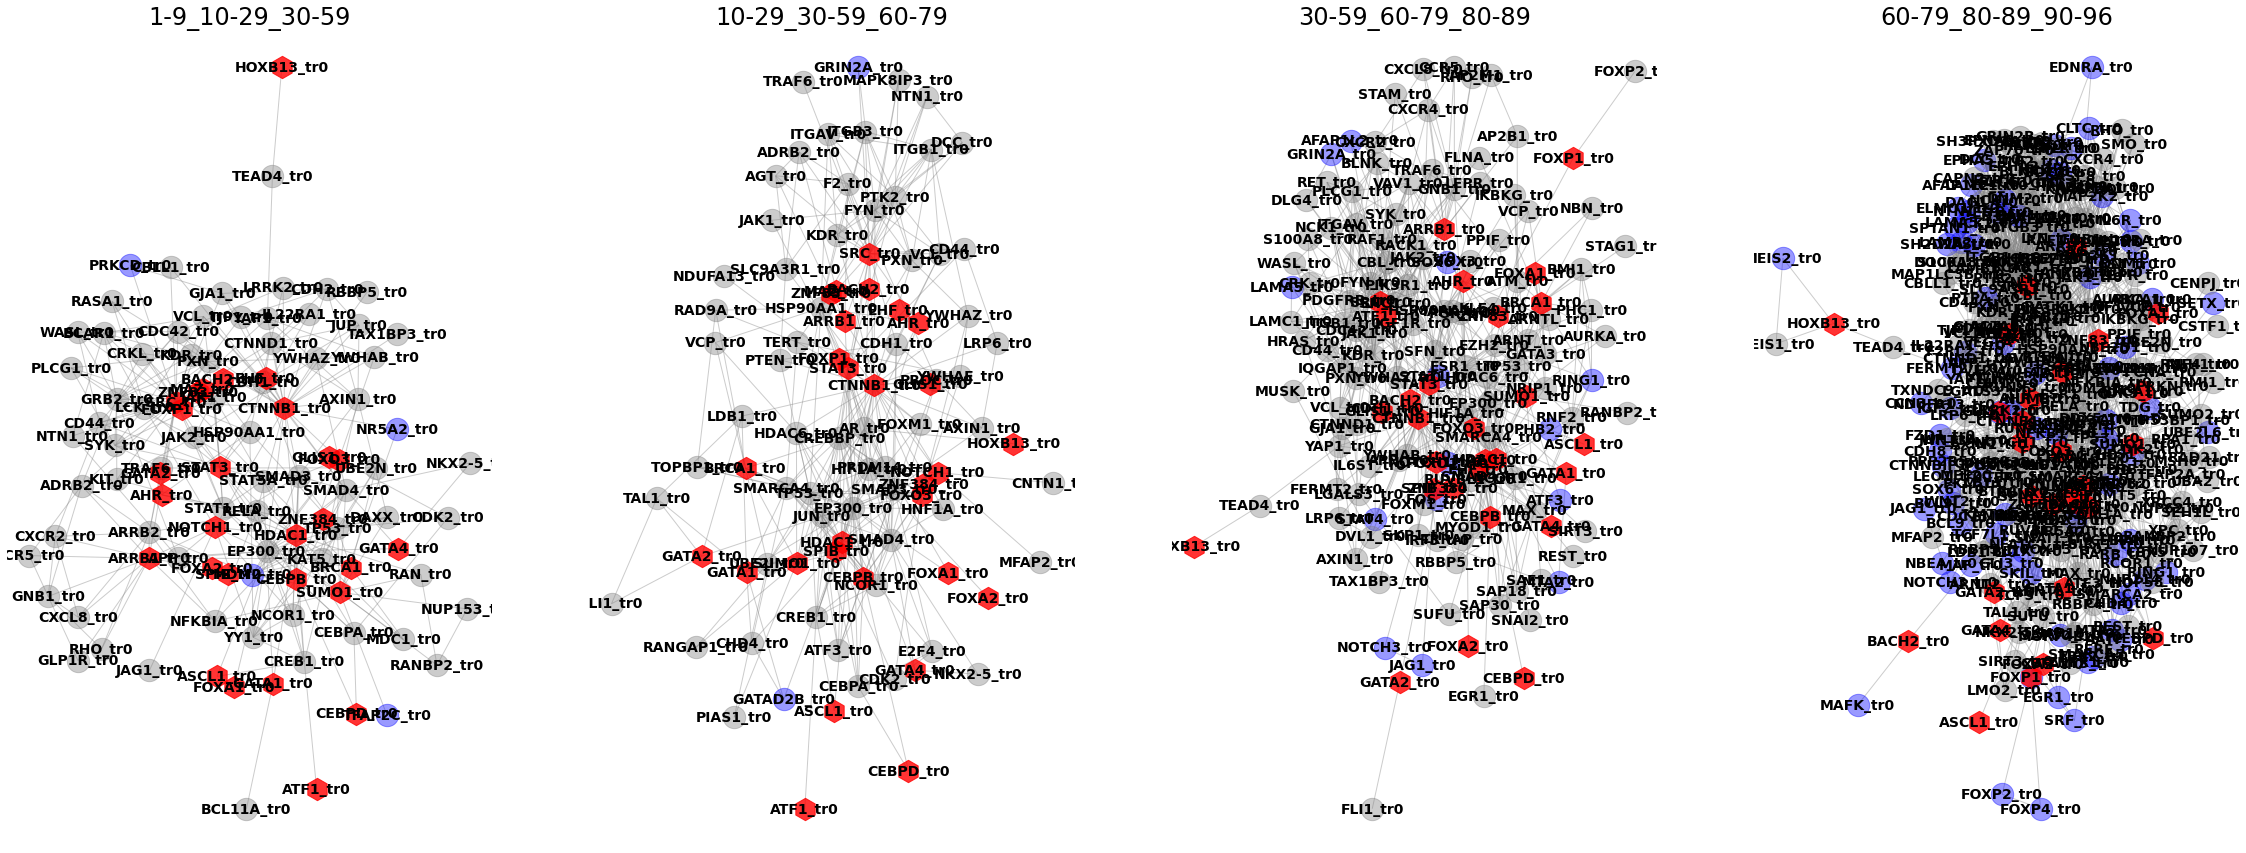

<Figure size 432x288 with 0 Axes>

In [61]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "5%", design = 2)
TFs = shared_TFs_design2

nbh.plot_neighborhood_all_networks(TFs,
                                 net_dict,
                                 cthreshold = 0.3, 
                                 nodesize = 500,
                                 save=False)
plt.savefig(fig_dir+'nets_shared_TFs.png')

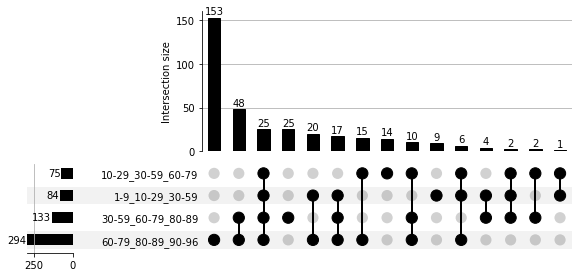

In [62]:
# How strongly do these neighborhoods overlap?
nbh.get_neighborhood_intersections(TFs, net_dict, cthreshold = 0.3)
plt.savefig(fig_dir+'intersection_neighborhood_sharedTFs.png')

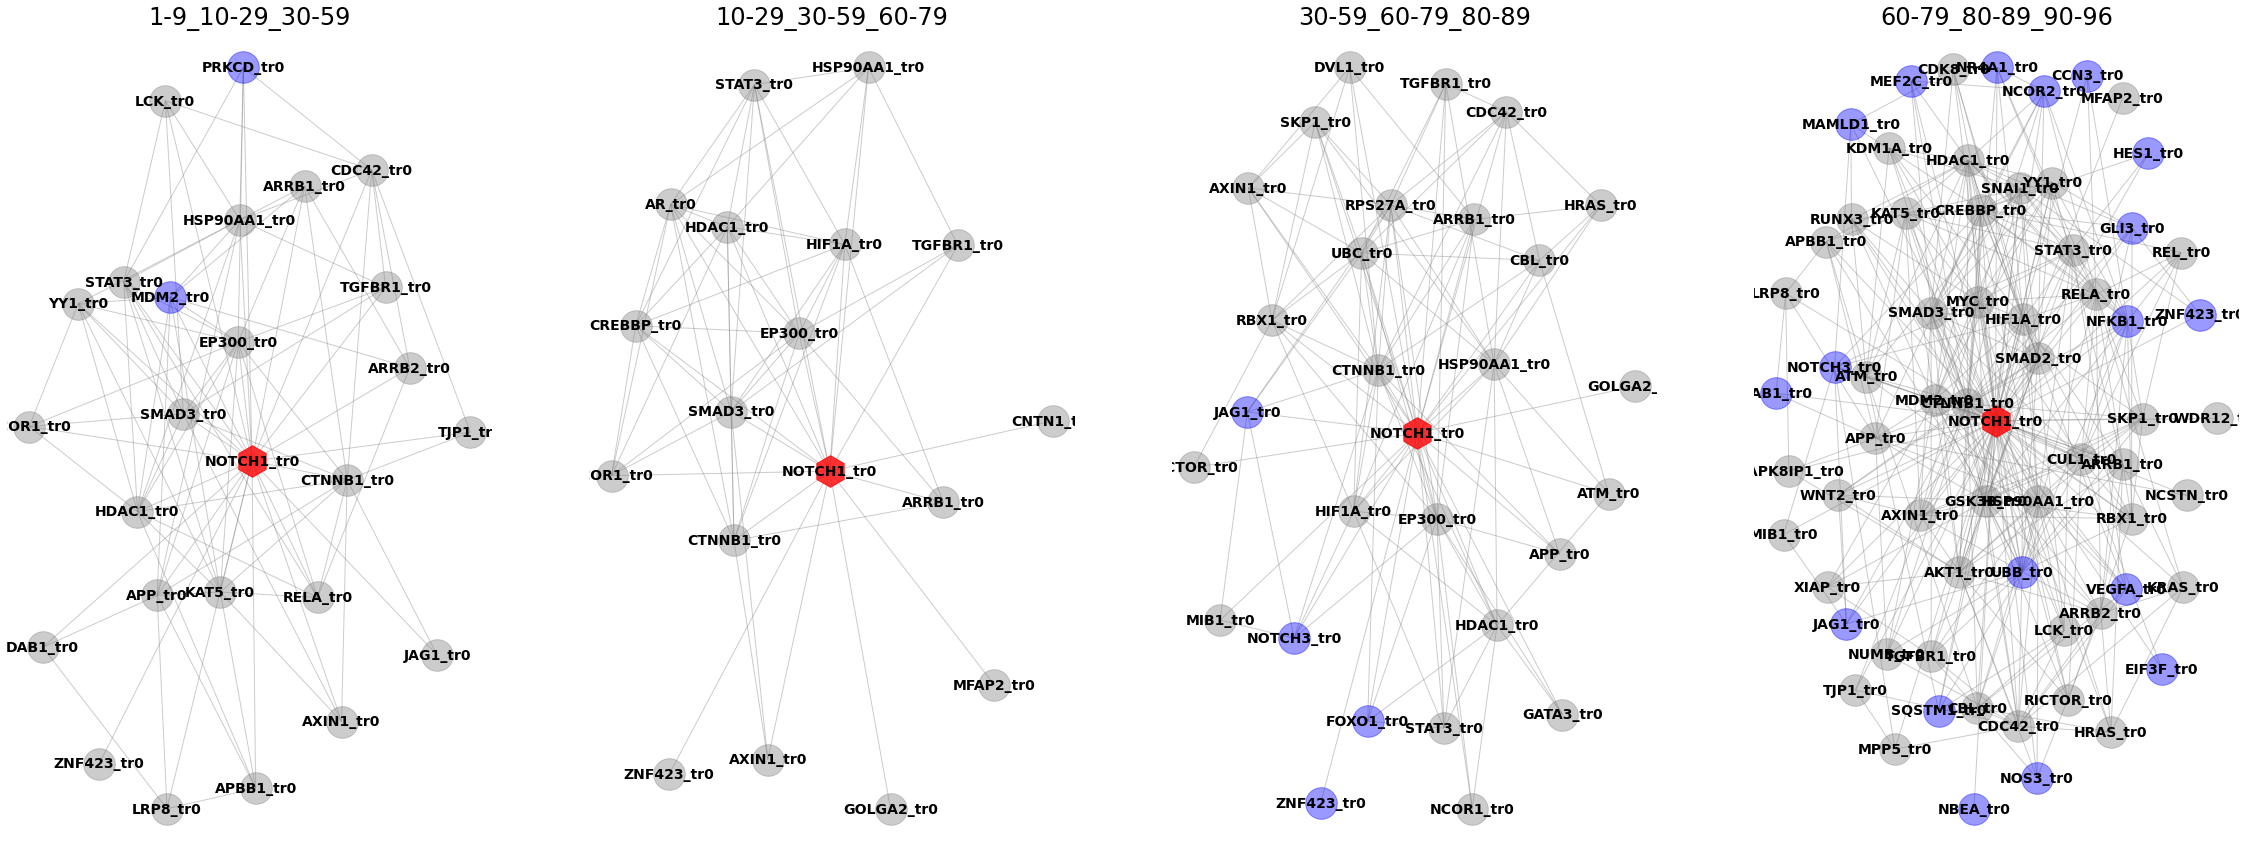

In [55]:
TFs = ["NOTCH1"]
nbh.plot_neighborhood_all_networks(TFs,
                                 net_dict,
                                 cthreshold = 0.8, 
                                 nodesize = 1000,
                                 save=False)

## Young-specific TFs

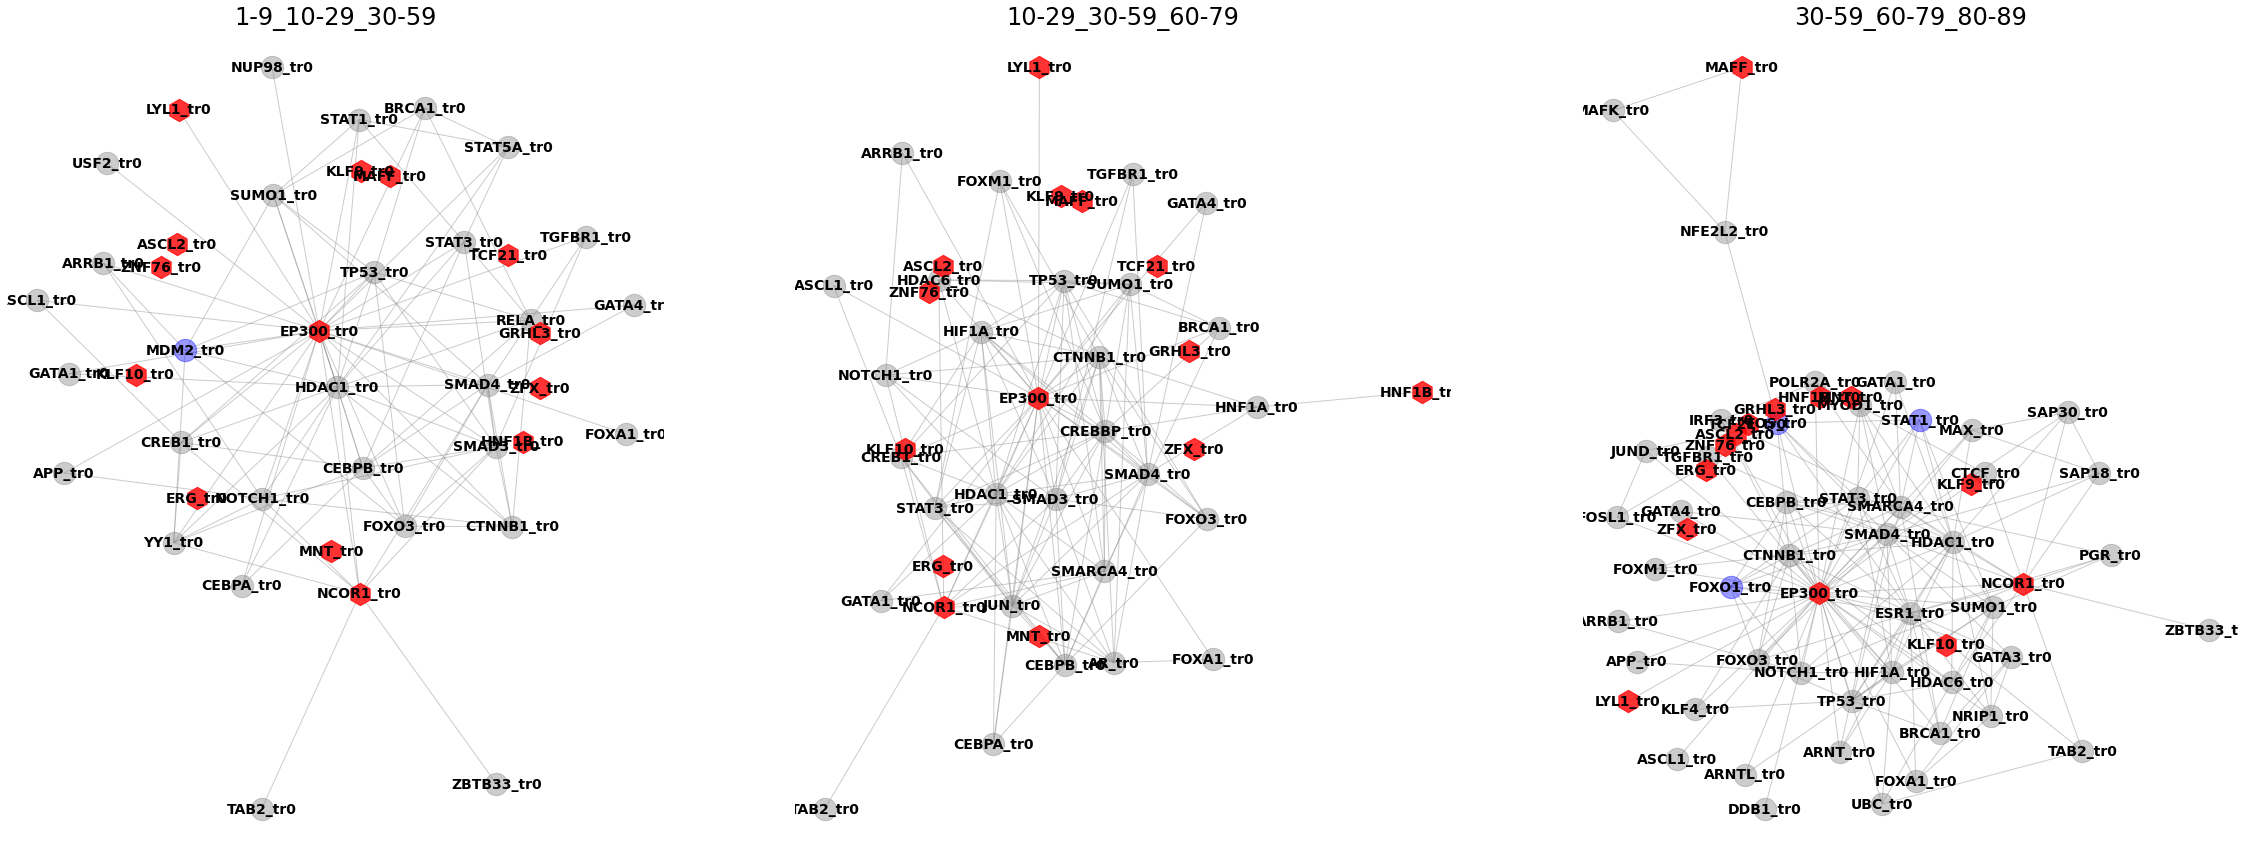

<Figure size 432x288 with 0 Axes>

In [63]:
TFs = young_specific_TFs(incl_TFs_2)
net_dict.pop('5%.allTFs.60-79_80-89_90-96', None)
nbh.plot_neighborhood_all_networks(TFs,
                                 net_dict,
                                 cthreshold = 0.3, 
                                 nodesize = 500,
                                 save=False)
plt.savefig(fig_dir+'nets_young_TFs.png')

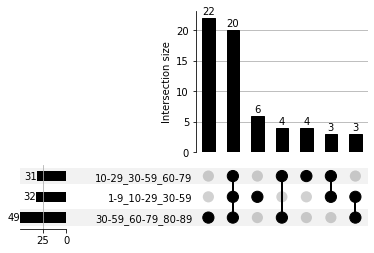

In [64]:
# How strongly do these neighborhoods overlap?
nbh.get_neighborhood_intersections(TFs, net_dict, cthreshold = 0.3)
plt.savefig(fig_dir+'intersection_neighborhood_youngTFs.png')

## Old-specific TFs

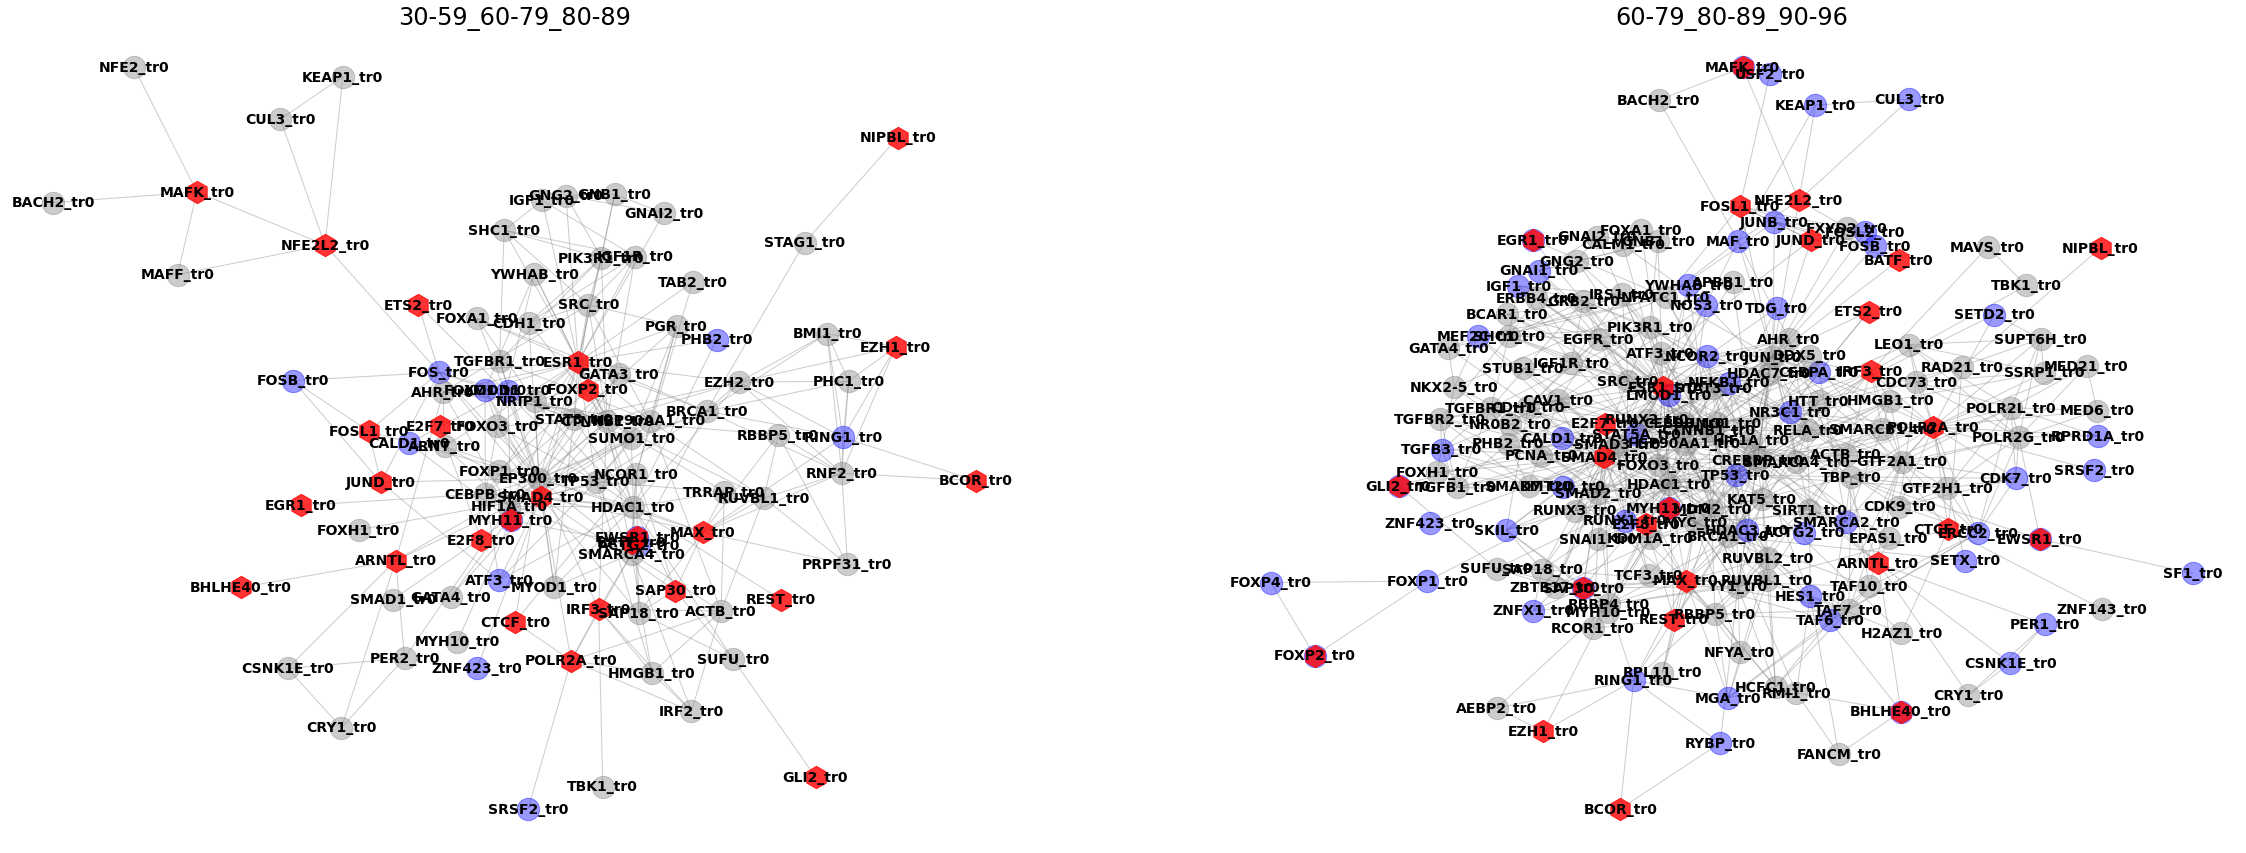

<Figure size 432x288 with 0 Axes>

In [58]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "5%", design = 2)
net_dict.pop('5%.allTFs.1-9_10-29_30-59', None)
net_dict.pop('5%.allTFs.10-29_30-59_60-79', None)
TFs = old_specific_TFs(incl_TFs_2)

nbh.plot_neighborhood_all_networks(TFs,
                                 net_dict,
                                 cthreshold = 0.3, 
                                 nodesize = 500,
                                 save=False)
plt.savefig(fig_dir+'nets_old_TFs.png')

# Distances inside and between TF groups

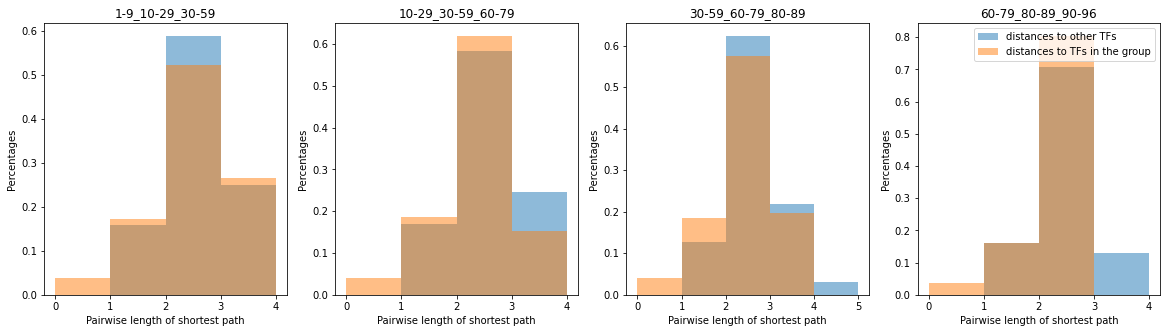

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
binwidth = 1   
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "5%", design = 2)

for (name, net), ax in zip(net_dict.items(), axs.ravel()):
    # Filter network to the nodes on the left
    right_side = [node for node in list(net.nodes()) if node.endswith('_tr1')]
    net.remove_nodes_from(right_side)

    TFs = [TF + '_tr0' for TF in shared_TFs_design2]
    all_TFs = [TF + '_tr0' for TF_list in incl_TFs_2 for TF in TF_list]

    group_distances = []
    other_distances = []

    for node_dict in nx.all_pairs_shortest_path_length(net):
        if node_dict[0] not in TFs:
            continue

        for key, value in node_dict[1].items():
            if key in TFs: 
                group_distances.append(value)
            elif key in all_TFs:
                other_distances.append(value)
 
    ax.hist(other_distances, weights=np.ones_like(other_distances) / len(other_distances),
             bins=np.arange(min(other_distances), max(other_distances) + binwidth, binwidth), 
             alpha=0.5, label="distances to other TFs")
    ax.hist(group_distances, weights=np.ones_like(group_distances) / len(group_distances),
             bins=np.arange(min(group_distances), max(group_distances) + binwidth, binwidth), 
             alpha=0.5, label="distances to TFs in the group")
    ax.set_xlabel("Pairwise length of shortest path")
    ax.set_ylabel("Percentages")
    plt.legend(loc='upper right')
    ax.set_title(name.split(".")[2])
    
plt.show()

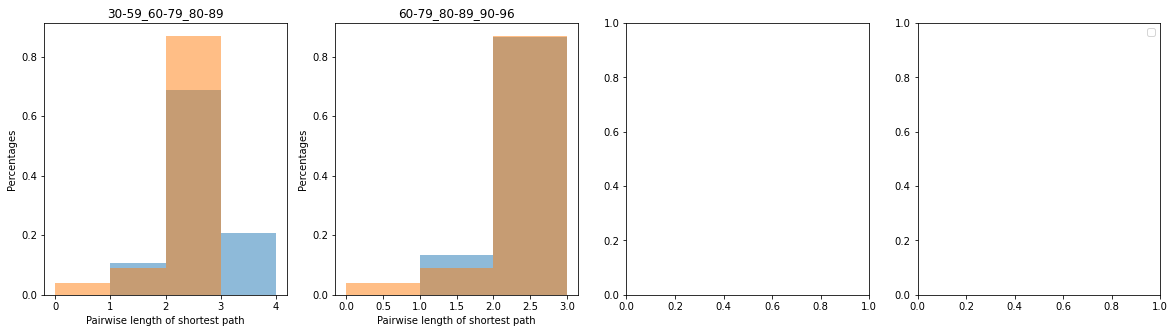

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
binwidth = 1  

net_dict.pop('5%.allTFs.1-9_10-29_30-59', None)
net_dict.pop('5%.allTFs.10-29_30-59_60-79', None)

for (name, net), ax in zip(net_dict.items(), axs.ravel()):
    # Filter network to the nodes on the left
    right_side = [node for node in list(net.nodes()) if node.endswith('_tr1')]
    net.remove_nodes_from(right_side)

    TFs = [TF + '_tr0' for TF in old_specific_TFs(incl_TFs_2)]
    all_TFs = [TF + '_tr0' for TF_list in incl_TFs_2 for TF in TF_list]

    group_distances = []
    other_distances = []

    for node_dict in nx.all_pairs_shortest_path_length(net):
        if node_dict[0] not in TFs:
            continue

        for key, value in node_dict[1].items():
            if key in TFs: 
                group_distances.append(value)
            elif key in all_TFs:
                other_distances.append(value)
 
    ax.hist(other_distances, weights=np.ones_like(other_distances) / len(other_distances),
             bins=np.arange(min(other_distances), max(other_distances) + binwidth, binwidth), 
             alpha=0.5, label="distances to other TFs")
    ax.hist(group_distances, weights=np.ones_like(group_distances) / len(group_distances),
             bins=np.arange(min(group_distances), max(group_distances) + binwidth, binwidth), 
             alpha=0.5, label="distances to TFs in the group")
    ax.set_xlabel("Pairwise length of shortest path")
    ax.set_ylabel("Percentages")
    plt.legend(loc='upper right')
    ax.set_title(name.split(".")[2])
    
plt.show()

In [ ]:
net_dict = pcst.get_net_dir_all_stages(save_dir, "allTFs", "5%", design = 2)
net_dict